# Product Market Forecasting using Bass Model

In [225]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from scipy.integrate import odeint
from scipy.misc import derivative
import statsmodels.formula.api as smf
from datetime import datetime

In [226]:
def densityFunction(p, q, t):
    return (np.exp((p+q)*t)*p*(p+q)**2)/((p*np.exp((p+q)*t)+q)**2)

In [227]:
t = np.linspace(1, 20, 20) #time
m = 100000 #market size
p = 0.01 #coefficient of innovation
q = 0.2 #coefficient of imitation

In [228]:
f = densityFunction(p,q,t)

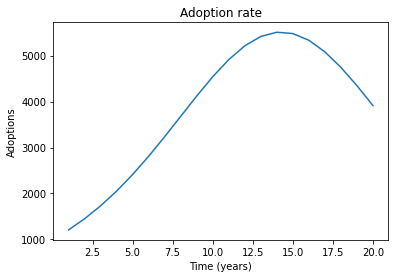

In [229]:
fig = plt.figure()
plt.plot(t, m*f)
plt.ylabel('Adoptions')
plt.xlabel('Time (years)')
plt.title("Adoption rate")
#plt.legend()
plt.show()

In [230]:
# Bass model
def FF(p, q, t):
    return p*(np.exp((p+q)*t)-1)/(p*np.exp((p+q)*t)+q)

# iPhone Sales Forecast

In [231]:
data = pd.read_csv('iphone_sales.txt', delim_whitespace=True)

In [232]:
data.head()

Quarter  Sales_MM_units
0   Q3_07            0.27
1   Q4_07            1.12
2   Q1_08            2.32
3   Q2_08            1.70
4   Q3_08            0.72

In [233]:
quarter = data['Quarter']

In [234]:
qs = quarter.str.replace(r'(Q\d)_(\d+)', r'20\2-\1')

In [235]:
data['date'] = pd.PeriodIndex(qs.values, freq='Q').to_timestamp()

In [236]:
date = data['date']

In [237]:
sales = data['Sales_MM_units']

In [238]:
cum_sales = np.cumsum(sales)

In [239]:
cum_sales_squared = cum_sales**2

In [240]:
mod = smf.ols(formula='sales ~ cum_sales + cum_sales_squared', data=data)

In [241]:
res = mod.fit()

In [242]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     109.9
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           4.61e-15
Time:                        03:50:58   Log-Likelihood:                -120.18
No. Observations:                  35   AIC:                             246.4
Df Residuals:                      32   BIC:                             251.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.6963      2.20

In [243]:
b = res.params

In [244]:
b

Intercept            3.696307
cum_sales            0.112994
cum_sales_squared   -0.000055
dtype: float64

In [245]:
m1 = (-b['cum_sales']+np.sqrt(b['cum_sales']**2 - 4*b['Intercept']*b['cum_sales_squared']))/(2*b['cum_sales_squared'])
m1

-32.206910098759515

In [246]:
m2 = (-b['cum_sales']-np.sqrt(b['cum_sales']**2 - 4*b['Intercept']*b['cum_sales_squared']))/(2*b['cum_sales_squared'])
m2

2083.822017493287

In [247]:
m = max(m1, m2)

In [248]:
print(m)

2083.822017493287


In [249]:
p = b['Intercept']/m

In [250]:
q = -m*b['cum_sales_squared']

In [251]:
print("p = ",p)
print("q = ", q)

p =  0.0017738112418998326
q =  0.11476751136366702


In [252]:
date_forecast = pd.date_range(start='2007-Q3', end='2030-Q3', freq='QS')

In [253]:
t = range(len(date_forecast))

In [254]:
f = densityFunction(p,q,t)
sales_forecast = m*f

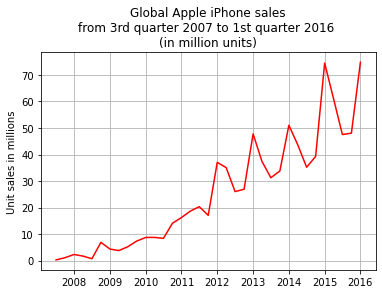

In [255]:
fig, ax = plt.subplots()
ax.plot(date, sales, color='red')
plt.ylabel('Unit sales in millions')
#plt.xlabel('time')
plt.title("Global Apple iPhone sales\nfrom 3rd quarter 2007 to 1st quarter 2016 \n(in million units)")
#plt.legend()
ax.grid(True)
plt.show()

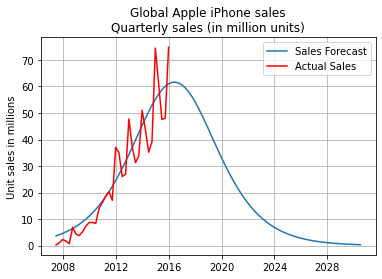

In [256]:
fig, ax = plt.subplots()
ax.plot(date_forecast, sales_forecast, label='Sales Forecast')
ax.plot(date, sales, color='red', label='Actual Sales')
plt.ylabel('Unit sales in millions')
#plt.xlabel('time')
plt.title("Global Apple iPhone sales\nQuarterly sales (in million units)")
plt.legend()
ax.grid(True)
plt.show()

In [257]:
sales_apple = sales
date_apple = date
date_forecast_apple = date_forecast
sales_forecast_apple = sales_forecast

## Sales Peak

In [258]:
peak_time = -1/(p+q)*np.log(p/q)

In [259]:
print(peak_time)

35.77939457746892


In [262]:
print(data['Sales_MM_units'].idxmax() + 1)

35


# Samsumg Galaxy Phone Sales

In [191]:
data = pd.read_csv('galaxy_sales.csv')

In [192]:
data.head()

Quarter  sales
0  Q1 '10  64.90
1  Q2 '10  65.33
2  Q3 '10  71.67
3  Q4 '10  79.17
4  Q1 '11  68.78

In [193]:
quarter = data['Quarter']

In [194]:
qs = quarter.str.replace(r"(Q\d) '(\d+)", r'20\2-\1')

In [195]:
qs = qs.str.replace('*', '')

In [196]:
data['date'] = pd.PeriodIndex(qs.values, freq='Q').to_timestamp()

In [197]:
date = data['date']

In [198]:
# Get coefficients
sales = data['sales']

In [199]:
cum_sales = np.cumsum(sales)
cum_sales_squared = cum_sales**2

In [200]:
mod = smf.ols(formula='sales ~ cum_sales + cum_sales_squared', data=data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     43.44
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           8.17e-08
Time:                        03:42:48   Log-Likelihood:                -73.418
No. Observations:                  22   AIC:                             152.8
Df Residuals:                      19   BIC:                             156.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            53.7484      4.50

In [201]:
b = res.params

In [202]:
m1 = (-b['cum_sales']+np.sqrt(b['cum_sales']**2 - 4*b['Intercept']*b['cum_sales_squared']))/(2*b['cum_sales_squared'])
m2 = (-b['cum_sales']-np.sqrt(b['cum_sales']**2 - 4*b['Intercept']*b['cum_sales_squared']))/(2*b['cum_sales_squared'])

In [203]:
m = max(m1, m2)

In [204]:
p = b['Intercept']/m
q = -m*b['cum_sales_squared']
print("p = ",p)
print("q = ", q)

p =  0.01624326146499484
q =  0.09284320017915793


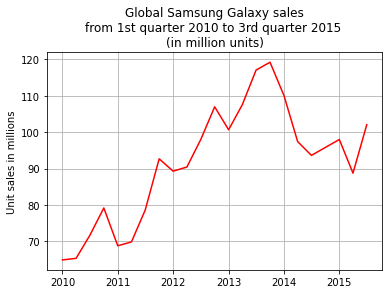

In [205]:
fig, ax = plt.subplots()
ax.plot(date, sales, color='red')
plt.ylabel('Unit sales in millions')
#plt.xlabel('time')
plt.title("Global Samsung Galaxy sales\nfrom 1st quarter 2010 to 3rd quarter 2015 \n(in million units)")
#plt.legend()
ax.grid(True)
plt.show()

In [206]:
date_forecast = pd.date_range(start='2010-Q1', end='2030-Q3', freq='QS')

In [207]:
t = range(len(date_forecast))
f = densityFunction(p,q,t)
sales_forecast = m*f

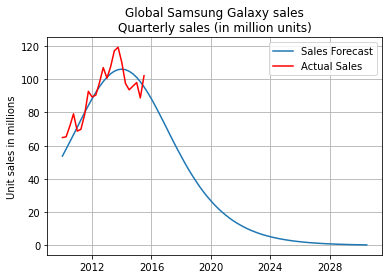

In [208]:
fig, ax = plt.subplots()
ax.plot(date_forecast, sales_forecast, label='Sales Forecast')
ax.plot(date, sales, color='red', label='Actual Sales')
plt.ylabel('Unit sales in millions')
#plt.xlabel('time')
plt.title("Global Samsung Galaxy sales\nQuarterly sales (in million units)")
plt.legend()
ax.grid(True)
plt.show()

In [209]:
sales_samsung = sales
date_samsung = date
date_forecast_samsung = date_forecast
sales_forecast_samsung = sales_forecast

## Sales Peak

In [210]:
peak_time = -1/(p+q)*np.log(p/q)

In [211]:
print(peak_time)

15.98029563590452


In [223]:
print(data['sales'].idxmax() + 1)

16


# Comparison

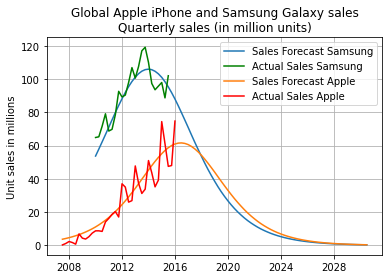

In [123]:
fig, ax = plt.subplots()
ax.plot(date_forecast_samsung, sales_forecast_samsung, label='Sales Forecast Samsung')
ax.plot(date_samsung, sales_samsung, color='green', label='Actual Sales Samsung')
ax.plot(date_forecast_apple, sales_forecast_apple, label='Sales Forecast Apple')
ax.plot(date_apple, sales_apple, color='red', label='Actual Sales Apple')
plt.ylabel('Unit sales in millions')
#plt.xlabel('time')
plt.title("Global Apple iPhone and Samsung Galaxy sales\nQuarterly sales (in million units)")
plt.legend()
ax.grid(True)
plt.show()

# References

https://srdas.github.io/MLBook/productForecastingBassModel.html#main-ideas

https://faculty.biu.ac.il/~fruchtg/829/lec/6.pdf

https://app.box.com/s/8uduwzfyezeoupqii76u7a6ro3somole?page=1

https://www.statsmodels.org/devel/example_formulas.html

https://www.datarobot.com/blog/ordinary-least-squares-in-python/

https://www.statista.com/statistics/263401/global-apple-iphone-sales-since-3rd-quarter-2007/

https://docs.python.org/3/howto/regex.html

https://stackoverflow.com/questions/53898482/clean-way-to-convert-quarterly-periods-to-datetime-in-pandas